In [2]:
import sys
sys.path.append('../')

import robot_simulator as s
import matplotlib.pyplot as plt

### Test Simulator

In [3]:
config_file = "/usr/src/data/configuration.yaml"
simulator = s.robot_simulator(config_file)
simulator.reset()

In [7]:
from scipy.spatial.transform import Rotation
import numpy as np


def normalizeAngle(angle):
    if(angle>np.pi):angle -=np.pi
    elif(angle<0):angle += np.pi
    return angle

# Set the end effector destination as as the position of the object
# change object to pick if it is picked
picked = simulator.objPicked
for i in range(len(picked)):
    if(picked[i] == 1):
        simulator.data.site(1).xpos = simulator.data.site(i+2).xpos.copy()
        # Reset The height of the object respect the base link
        simulator.data.site(1).xpos[2] = simulator.data.site(i+2).xpos[2] - 0.11
        # Get z-rotation of the object
        rot = Rotation.from_quat(simulator.data.qpos[3:7*(i+1)].copy()).as_euler('xyz')
        rot = normalizeAngle(2.35+rot[0])
        print("Object to pick:", i+2)
        break
    else:
        simulator.data.site(1).xpos = simulator.data.site(i+1).xpos.copy()
        # Reset The height of the object respect the base link
        simulator.data.site(1).xpos[2] = simulator.data.site(i+1).xpos[2] - 0.11
        # Get z-rotation of the object
        rot = Rotation.from_quat(simulator.data.qpos[3:7*(1)].copy()).as_euler('xyz')
        rot = normalizeAngle(2.35+rot[0])
        print("Object to place:", i+1)
        break
coords = simulator.data.site(1).xpos.copy()
print("Initial coordinates:", coords)


print("Initial rotation:", rot)

Object to place: 1
Initial coordinates: [-0.36403338  0.32452282  0.08222582]
Initial rotation: 0.3844003271600087


Initial Joint Position: [0. 0. 0. 0. 0. 0. 0. 0. 0.]
Object Position: [-0.36403338  0.32452282  0.08222582]


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (300, 300) to (304, 304) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video saved to /usr/src/data/recordings/simulated_pick_1.mp4
Result of the Simulator: 1


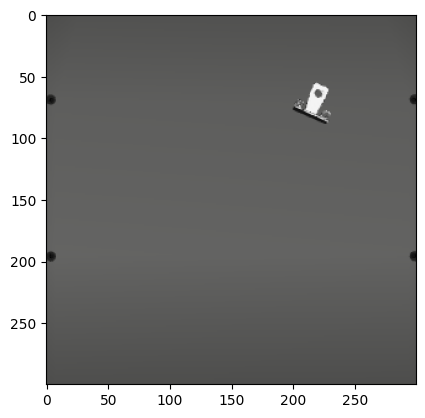

In [8]:
# Run the pick simulation
image, result = simulator.simulate_pick(coords,rot)

# Plot the image returned by the simulator
plt.imshow(image)

#1 if the pick was successful, 0 otherwise
print("Result of the Simulator:",result)

In [5]:
import os
from IPython.display import HTML

if simulator.configs["IS_SIMULATION_RECORD"]:
    # Construct video path
    video_name = f"simulated_pick_{simulator.counter}.mp4"
    video_path = os.path.join(simulator.configs["RECORD_FOLDER"], video_name)
    
    display(HTML(f"""
    <div style="text-align: center;">
        <video width="300" height="300" controls>
            <source src="{video_path}" type="video/mp4">
            Your browser does not support the video tag.
        </video>
    </div>
    """))


In [6]:
#shuffle pieces
simulator.reset()